In [1]:
#install the requirements
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
#Keypoints using MP Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results


In [4]:
    def draw_style_landmarks(image, results):
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [5]:
cap = cv2.VideoCapture(0)
cap.set(3, 1080)
cap.set(4, 960)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_style_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
draw_style_landmarks(frame, results)

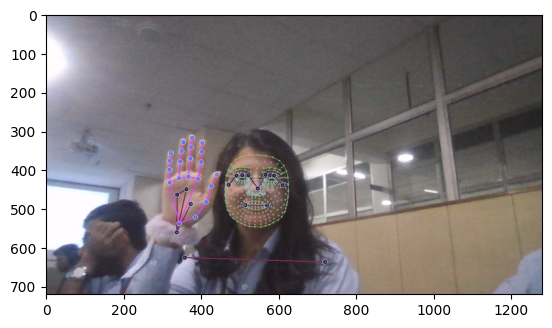

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
#extract keypoint values
len(results.pose_landmarks.landmark)

33

In [10]:
def extract_keypoints(results):
    pose=np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
np.save('0', result_test)

In [13]:
np.load('0.npy')

array([ 0.61884302,  0.2312538 ,  0.36961764, ...,  0.28257638,
        0.15626772, -0.02963237])

In [14]:
#folders for collection
DATA_PATH = os.path.join('MP_Data')
actions= np.array(['hello', 'thanks', 'iloveyou'])
no_sequences=30
sequence_length=30

In [15]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [19]:
#collecting keypoint values for training and testing

In [ ]:
cap = cv2.VideoCapture(1)
cap.set(3, 1080)
cap.set(4, 960)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                print(results)

                draw_style_landmarks(image, results)
                if frame_num==0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints =  extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [16]:
#preprocess data, create labels and features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
label_map={label:num for num, label in enumerate(actions)}

In [18]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [19]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(labels).shape

(90,)

In [21]:
np.array(sequences).shape

(90, 30, 1662)

In [22]:
X=np.array(sequences)

In [23]:
X.shape

(90, 30, 1662)

In [24]:
y= to_categorical(labels).astype(int)

In [25]:
y.shape

(90, 3)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [28]:
X_train.shape

(85, 30, 1662)

In [29]:
#build and train LSTM NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [30]:
log_dir = os.path.join('Logs')
tb_callback= TensorBoard(log_dir=log_dir)

In [31]:
model =Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
res=[0.7,0.2,0.1]

In [33]:
actions[np.argmax(res)]

'hello'

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5000, callbacks=[tb_callback])

Epoch 1/5000
3/3 [==============================] - 4s 67ms/step - loss: 1.3948 - categorical_accuracy: 0.3765
Epoch 2/5000
3/3 [==============================] - 0s 60ms/step - loss: 4.6045 - categorical_accuracy: 0.4000
Epoch 3/5000
3/3 [==============================] - 0s 59ms/step - loss: 1.1121 - categorical_accuracy: 0.2941
Epoch 4/5000
3/3 [==============================] - 0s 61ms/step - loss: 1.2507 - categorical_accuracy: 0.3176
Epoch 5/5000
3/3 [==============================] - 0s 63ms/step - loss: 1.3731 - categorical_accuracy: 0.2235
Epoch 6/5000
3/3 [==============================] - 0s 65ms/step - loss: 1.0440 - categorical_accuracy: 0.4941
Epoch 7/5000
3/3 [==============================] - 0s 64ms/step - loss: 1.0925 - categorical_accuracy: 0.3647
Epoch 8/5000
3/3 [==============================] - 0s 66ms/step - loss: 1.0075 - categorical_accuracy: 0.4588
Epoch 9/5000
3/3 [==============================] - 0s 59ms/step - loss: 1.0558 - categorical_accuracy: 0.4471
E

3/3 [==============================] - 0s 76ms/step - loss: 3.1351e-05 - categorical_accuracy: 1.0000
Epoch 145/5000
3/3 [==============================] - 0s 75ms/step - loss: 3.0673e-05 - categorical_accuracy: 1.0000
Epoch 146/5000
3/3 [==============================] - 0s 81ms/step - loss: 2.9689e-05 - categorical_accuracy: 1.0000
Epoch 147/5000
3/3 [==============================] - 0s 77ms/step - loss: 2.8658e-05 - categorical_accuracy: 1.0000
Epoch 148/5000
3/3 [==============================] - 0s 82ms/step - loss: 2.8011e-05 - categorical_accuracy: 1.0000
Epoch 149/5000
3/3 [==============================] - 0s 76ms/step - loss: 2.7112e-05 - categorical_accuracy: 1.0000
Epoch 150/5000
3/3 [==============================] - 0s 84ms/step - loss: 2.6325e-05 - categorical_accuracy: 1.0000
Epoch 151/5000
3/3 [==============================] - 0s 82ms/step - loss: 2.5319e-05 - categorical_accuracy: 1.0000
Epoch 152/5000
3/3 [==============================] - 0s 77ms/step - loss: 2.43

3/3 [==============================] - 0s 86ms/step - loss: 1.1808e-06 - categorical_accuracy: 1.0000
Epoch 285/5000
3/3 [==============================] - 0s 79ms/step - loss: 1.1696e-06 - categorical_accuracy: 1.0000
Epoch 286/5000
3/3 [==============================] - 0s 76ms/step - loss: 1.1626e-06 - categorical_accuracy: 1.0000
Epoch 287/5000
3/3 [==============================] - 0s 75ms/step - loss: 1.1486e-06 - categorical_accuracy: 1.0000
Epoch 288/5000
3/3 [==============================] - 0s 80ms/step - loss: 1.1430e-06 - categorical_accuracy: 1.0000
Epoch 289/5000
3/3 [==============================] - 0s 75ms/step - loss: 1.1360e-06 - categorical_accuracy: 1.0000
Epoch 290/5000
3/3 [==============================] - 0s 79ms/step - loss: 1.1275e-06 - categorical_accuracy: 1.0000
Epoch 291/5000
3/3 [==============================] - 0s 76ms/step - loss: 1.1163e-06 - categorical_accuracy: 1.0000
Epoch 292/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.10

3/3 [==============================] - 0s 77ms/step - loss: 4.7543e-07 - categorical_accuracy: 1.0000
Epoch 425/5000
3/3 [==============================] - 0s 75ms/step - loss: 4.7262e-07 - categorical_accuracy: 1.0000
Epoch 426/5000
3/3 [==============================] - 0s 78ms/step - loss: 4.6842e-07 - categorical_accuracy: 1.0000
Epoch 427/5000
3/3 [==============================] - 0s 74ms/step - loss: 4.6561e-07 - categorical_accuracy: 1.0000
Epoch 428/5000
3/3 [==============================] - 0s 78ms/step - loss: 4.6421e-07 - categorical_accuracy: 1.0000
Epoch 429/5000
3/3 [==============================] - 0s 73ms/step - loss: 4.6281e-07 - categorical_accuracy: 1.0000
Epoch 430/5000
3/3 [==============================] - 0s 77ms/step - loss: 4.5860e-07 - categorical_accuracy: 1.0000
Epoch 431/5000
3/3 [==============================] - 0s 76ms/step - loss: 4.5720e-07 - categorical_accuracy: 1.0000
Epoch 432/5000
3/3 [==============================] - 0s 82ms/step - loss: 4.58

3/3 [==============================] - 0s 80ms/step - loss: 2.3561e-07 - categorical_accuracy: 1.0000
Epoch 565/5000
3/3 [==============================] - 0s 80ms/step - loss: 2.3561e-07 - categorical_accuracy: 1.0000
Epoch 566/5000
3/3 [==============================] - 0s 79ms/step - loss: 2.3421e-07 - categorical_accuracy: 1.0000
Epoch 567/5000
3/3 [==============================] - 0s 76ms/step - loss: 2.3281e-07 - categorical_accuracy: 1.0000
Epoch 568/5000
3/3 [==============================] - 0s 83ms/step - loss: 2.3140e-07 - categorical_accuracy: 1.0000
Epoch 569/5000
3/3 [==============================] - 0s 80ms/step - loss: 2.3000e-07 - categorical_accuracy: 1.0000
Epoch 570/5000
3/3 [==============================] - 0s 79ms/step - loss: 2.3000e-07 - categorical_accuracy: 1.0000
Epoch 571/5000
3/3 [==============================] - 0s 79ms/step - loss: 2.3000e-07 - categorical_accuracy: 1.0000
Epoch 572/5000
3/3 [==============================] - 0s 81ms/step - loss: 2.28

3/3 [==============================] - 0s 83ms/step - loss: 1.3464e-07 - categorical_accuracy: 1.0000
Epoch 705/5000
3/3 [==============================] - 0s 80ms/step - loss: 1.3464e-07 - categorical_accuracy: 1.0000
Epoch 706/5000
3/3 [==============================] - 0s 83ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 707/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 708/5000
3/3 [==============================] - 0s 76ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 709/5000
3/3 [==============================] - 0s 82ms/step - loss: 1.3043e-07 - categorical_accuracy: 1.0000
Epoch 710/5000
3/3 [==============================] - 0s 76ms/step - loss: 1.3043e-07 - categorical_accuracy: 1.0000
Epoch 711/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.3043e-07 - categorical_accuracy: 1.0000
Epoch 712/5000
3/3 [==============================] - 0s 78ms/step - loss: 1.30

3/3 [==============================] - 0s 76ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 845/5000
3/3 [==============================] - 0s 77ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 846/5000
3/3 [==============================] - 0s 77ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 847/5000
3/3 [==============================] - 0s 76ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 848/5000
3/3 [==============================] - 0s 79ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 849/5000
3/3 [==============================] - 0s 83ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 850/5000
3/3 [==============================] - 0s 79ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 851/5000
3/3 [==============================] - 0s 82ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 852/5000
3/3 [==============================] - 0s 81ms/step - loss: 8.13

3/3 [==============================] - 0s 80ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 985/5000
3/3 [==============================] - 0s 77ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 986/5000
3/3 [==============================] - 0s 81ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 987/5000
3/3 [==============================] - 0s 83ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 988/5000
3/3 [==============================] - 0s 85ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 989/5000
3/3 [==============================] - 0s 83ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 990/5000
3/3 [==============================] - 0s 83ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 991/5000
3/3 [==============================] - 0s 80ms/step - loss: 5.6098e-08 - categorical_accuracy: 1.0000
Epoch 992/5000
3/3 [==============================] - 0s 83ms/step - loss: 5.60

3/3 [==============================] - 0s 79ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1123/5000
3/3 [==============================] - 0s 86ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1124/5000
3/3 [==============================] - 0s 85ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1125/5000
3/3 [==============================] - 0s 81ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1126/5000
3/3 [==============================] - 0s 86ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1127/5000
3/3 [==============================] - 0s 81ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1128/5000
3/3 [==============================] - 0s 83ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1129/5000
3/3 [==============================] - 0s 79ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1130/5000
3/3 [==============================] - 0s 83ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1261/5000
3/3 [==============================] - 0s 89ms/step - loss: 3.2257e-08 - categorical_accuracy: 1.0000
Epoch 1262/5000
3/3 [==============================] - 0s 89ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1263/5000
3/3 [==============================] - 0s 82ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1264/5000
3/3 [==============================] - 0s 88ms/step - loss: 3.2257e-08 - categorical_accuracy: 1.0000
Epoch 1265/5000
3/3 [==============================] - 0s 83ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1266/5000
3/3 [==============================] - 0s 79ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1267/5000
3/3 [==============================] - 0s 79ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1268/5000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 91ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1399/5000
3/3 [==============================] - 0s 86ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1400/5000
3/3 [==============================] - 0s 83ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1401/5000
3/3 [==============================] - 0s 81ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1402/5000
3/3 [==============================] - 0s 88ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1403/5000
3/3 [==============================] - 0s 84ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1404/5000
3/3 [==============================] - 0s 81ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1405/5000
3/3 [==============================] - 0s 82ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1406/5000
3/3 [==============================] - 0s 89ms/step - lo

3/3 [==============================] - 0s 86ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1537/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1538/5000
3/3 [==============================] - 0s 84ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1539/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1540/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1541/5000
3/3 [==============================] - 0s 83ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1542/5000
3/3 [==============================] - 0s 92ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1543/5000
3/3 [==============================] - 0s 86ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 1544/5000
3/3 [==============================] - 0s 90ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1675/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1676/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1677/5000
3/3 [==============================] - 0s 89ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1678/5000
3/3 [==============================] - 0s 89ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1679/5000
3/3 [==============================] - 0s 83ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1680/5000
3/3 [==============================] - 0s 83ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1681/5000
3/3 [==============================] - 0s 82ms/step - loss: 1.2622e-08 - categorical_accuracy: 1.0000
Epoch 1682/5000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1813/5000
3/3 [==============================] - 0s 83ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1814/5000
3/3 [==============================] - 0s 83ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1815/5000
3/3 [==============================] - 0s 80ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1816/5000
3/3 [==============================] - 0s 88ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1817/5000
3/3 [==============================] - 0s 89ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1818/5000
3/3 [==============================] - 0s 86ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1819/5000
3/3 [==============================] - 0s 88ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 1820/5000
3/3 [==============================] - 0s 89ms/step - lo

3/3 [==============================] - 0s 88ms/step - loss: 7.0123e-09 - categorical_accuracy: 1.0000
Epoch 1951/5000
3/3 [==============================] - 0s 88ms/step - loss: 7.0123e-09 - categorical_accuracy: 1.0000
Epoch 1952/5000
3/3 [==============================] - 0s 88ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 1953/5000
3/3 [==============================] - 0s 90ms/step - loss: 7.0123e-09 - categorical_accuracy: 1.0000
Epoch 1954/5000
3/3 [==============================] - 0s 84ms/step - loss: 7.0123e-09 - categorical_accuracy: 1.0000
Epoch 1955/5000
3/3 [==============================] - 0s 81ms/step - loss: 7.0123e-09 - categorical_accuracy: 1.0000
Epoch 1956/5000
3/3 [==============================] - 0s 81ms/step - loss: 7.0123e-09 - categorical_accuracy: 1.0000
Epoch 1957/5000
3/3 [==============================] - 0s 87ms/step - loss: 7.0123e-09 - categorical_accuracy: 1.0000
Epoch 1958/5000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2089/5000
3/3 [==============================] - 0s 86ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2090/5000
3/3 [==============================] - 0s 82ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2091/5000
3/3 [==============================] - 0s 83ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2092/5000
3/3 [==============================] - 0s 81ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2093/5000
3/3 [==============================] - 0s 83ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2094/5000
3/3 [==============================] - 0s 88ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2095/5000
3/3 [==============================] - 0s 85ms/step - loss: 5.6098e-09 - categorical_accuracy: 1.0000
Epoch 2096/5000
3/3 [==============================] - 0s 86ms/step - lo

3/3 [==============================] - 0s 89ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2227/5000
3/3 [==============================] - 0s 89ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2228/5000
3/3 [==============================] - 0s 85ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2229/5000
3/3 [==============================] - 0s 86ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2230/5000
3/3 [==============================] - 0s 87ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2231/5000
3/3 [==============================] - 0s 90ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2232/5000
3/3 [==============================] - 0s 83ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2233/5000
3/3 [==============================] - 0s 82ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 2234/5000
3/3 [==============================] - 0s 83ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2365/5000
3/3 [==============================] - 0s 87ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2366/5000
3/3 [==============================] - 0s 89ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2367/5000
3/3 [==============================] - 0s 88ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2368/5000
3/3 [==============================] - 0s 89ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2369/5000
3/3 [==============================] - 0s 89ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2370/5000
3/3 [==============================] - 0s 87ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2371/5000
3/3 [==============================] - 0s 87ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2372/5000
3/3 [==============================] - 0s 87ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2503/5000
3/3 [==============================] - 0s 77ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2504/5000
3/3 [==============================] - 0s 81ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2505/5000
3/3 [==============================] - 0s 77ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2506/5000
3/3 [==============================] - 0s 81ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2507/5000
3/3 [==============================] - 0s 85ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2508/5000
3/3 [==============================] - 0s 81ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2509/5000
3/3 [==============================] - 0s 77ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 2510/5000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 85ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2641/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2642/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2643/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2644/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2645/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2646/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2647/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2648/5000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2779/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2780/5000
3/3 [==============================] - 0s 81ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2781/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2782/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2783/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2784/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2785/5000
3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2786/5000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 85ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2917/5000
3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2918/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2919/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2920/5000
3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2921/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2922/5000
3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2923/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 2924/5000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3055/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3056/5000
3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3057/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3058/5000
3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3059/5000
3/3 [==============================] - 0s 85ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3060/5000
3/3 [==============================] - 0s 77ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3061/5000
3/3 [==============================] - 0s 74ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 3062/5000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3193/5000
3/3 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3194/5000
3/3 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3195/5000
3/3 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3196/5000
3/3 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3197/5000
3/3 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3198/5000
3/3 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3199/5000
3/3 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3200/5000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3331/5000
3/3 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3332/5000
3/3 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3333/5000
3/3 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3334/5000
3/3 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3335/5000
3/3 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3336/5000
3/3 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3337/5000
3/3 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3338/5000
3/3 [==============================] - 0s 81ms/step - lo

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [39]:
#make predictions
res=model.predict(X_test)

1/1 [==============================] - 1s 506ms/step


In [40]:
res[0]

array([0.3725136 , 0.31952357, 0.3079628 ], dtype=float32)

In [41]:
np.sum(res[0])

1.0

In [42]:
actions[np.argmax(res[0])]

'hello'

In [43]:
actions[np.argmax(y_test[0])]

'hello'

In [44]:
#save weights
model.save('action.h5')

In [ ]:
del model

In [45]:
model.load_weights('action.h5')

In [46]:
#Evaluation by confusion matrix along with the accuracy check

In [47]:
#from sklearn.metrics import multilable_confusion_matrix, accuracy_score

In [48]:
#Evaluation in real time

In [49]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [60]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_style_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 10ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.pyth